In [1]:
## importing  libraries and dataset
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('student-data.csv')
data.head(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no


In [3]:
## data analysis
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

In [4]:
data.shape

(395, 31)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [6]:
## There are no null values present in the data

In [7]:
## Label encoding: It considers an order for encoding.Used for encoding nominal data.
## i.e Unordered groups cat,dog,tiger Or pizza,burger,coke etc.

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Mjob']=le.fit_transform(data['Mjob'])
data['Fjob']=le.fit_transform(data['Fjob'])
data['guardian']=le.fit_transform(data['guardian'])
data['reason']=le.fit_transform(data['reason'])

In [9]:
## One hot encoding: splits the categories into two columns and and puts 0,1 for the
## appropriate data.
## We are doing one hot encoding using pandas

In [10]:
data=pd.get_dummies(data,columns=['school','sex','address','famsize','Pstatus','schoolsup','famsup','paid','activities',
                                  'nursery','higher','internet','romantic','passed'],drop_first=True)

In [11]:
data.dtypes

age               int64
Medu              int64
Fedu              int64
Mjob              int32
Fjob              int32
reason            int32
guardian          int32
traveltime        int64
studytime         int64
failures          int64
famrel            int64
freetime          int64
goout             int64
Dalc              int64
Walc              int64
health            int64
absences          int64
school_MS         uint8
sex_M             uint8
address_U         uint8
famsize_LE3       uint8
Pstatus_T         uint8
schoolsup_yes     uint8
famsup_yes        uint8
paid_yes          uint8
activities_yes    uint8
nursery_yes       uint8
higher_yes        uint8
internet_yes      uint8
romantic_yes      uint8
passed_yes        uint8
dtype: object

In [12]:
## Feature engineering
## We will combine education levels of father and mother to'pedu', 
## jobs of parents to 'pjob' and support obtained to 'supp'
## with maximum values,then drops these columns to avoid overfitting of data. 

In [13]:
data['pedu']=data[['Medu','Fedu']].max(axis=1)
data['pjob']=data[['Mjob','Fjob']].max(axis=1)
data['supp']=data[['schoolsup_yes','famsup_yes']].max(axis=1)

In [14]:
data=data.drop(['Medu','Fedu','Mjob','Fjob','schoolsup_yes','famsup_yes'],axis=1,)

In [15]:
## similarly we dotis for daily,weekly alcohol consumptions.

In [16]:
data['accon']=data[['Dalc','Walc']].max(axis=1)

In [17]:
data=data.drop(['Dalc','Walc'],axis=1)

In [18]:
## plotting correlation heatmap

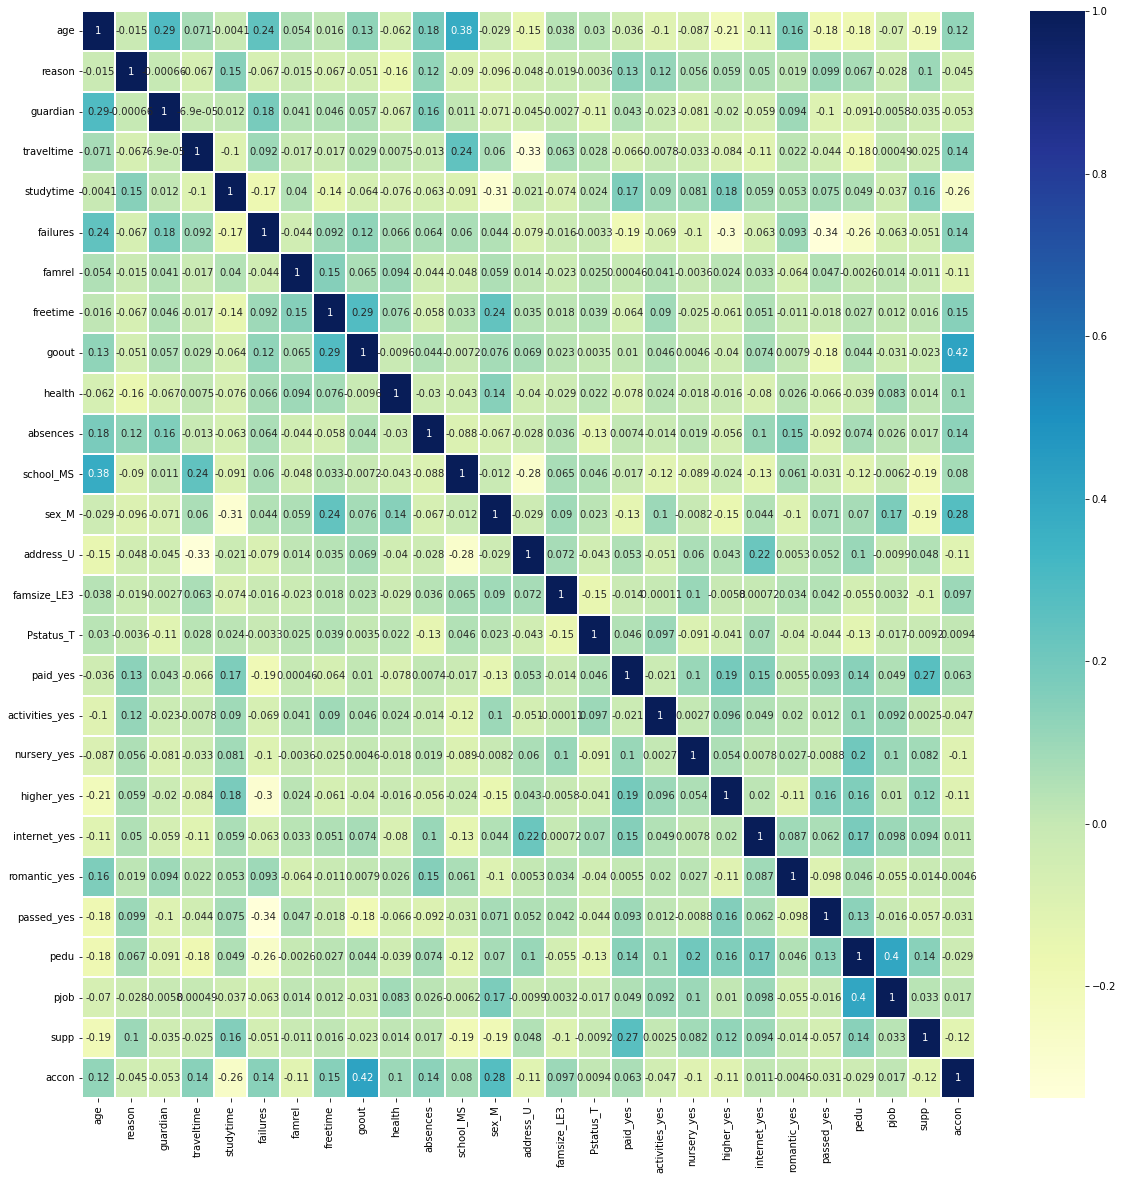

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,20))
corrplot=sns.heatmap(data.corr(),cmap='YlGnBu',annot=True,linewidths=0.2)
plt.show()

In [20]:
## Our dependent variable is passed column.
## similar columns with almost same correlation  are famrel & famsize, romantic & absence columns
## Hence we can drop any one of such columns

In [21]:
data=data.drop(['famrel','romantic_yes'],axis=1)

In [22]:
## splitting data and creating random forest classifier model

In [23]:
from sklearn.model_selection import train_test_split
X=data.drop(['passed_yes'],axis=1)
y=data['passed_yes']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [24]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score
print('Accuracy of predicted model is:',accuracy_score(y_test,y_pred))

Accuracy of predicted model is: 0.7474747474747475


In [26]:
from sklearn.metrics import f1_score
print('f1 score is:',f1_score(y_test,y_pred))

f1 score is: 0.8299319727891156


In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[13, 17],
       [ 8, 61]], dtype=int64)

In [28]:
## important features plotting

In [29]:
feature_imp=pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)

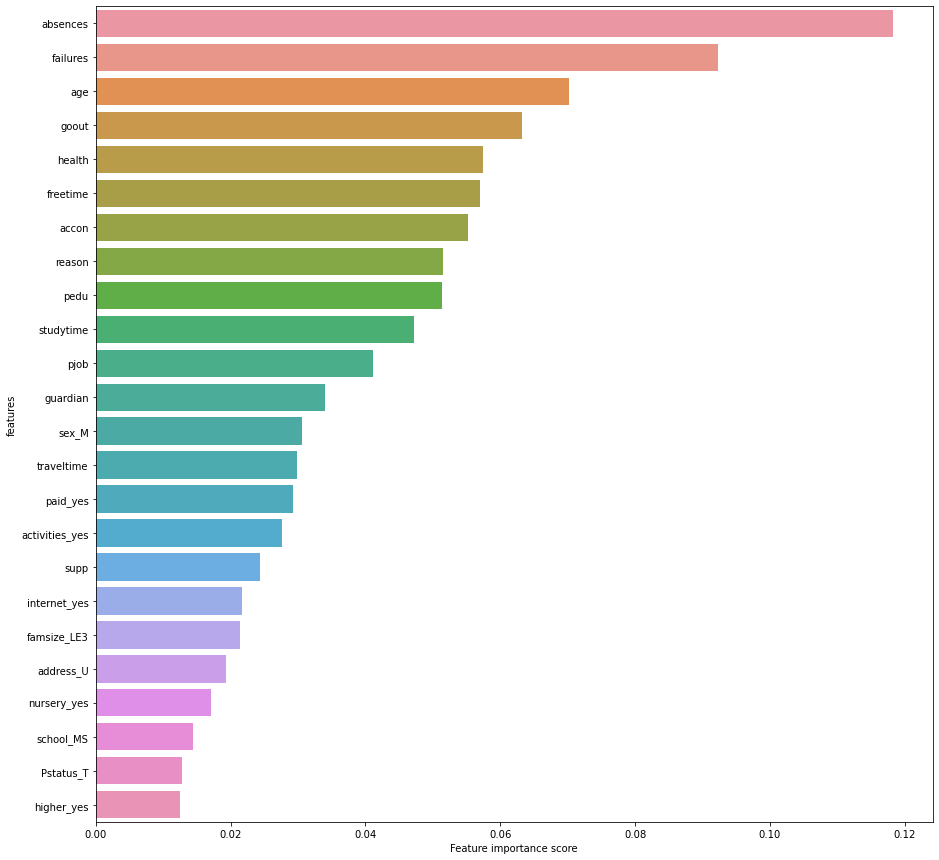

In [30]:
plt.figure(figsize=(15,15))
sns.barplot(x=feature_imp,y=feature_imp.index)
plt.ylabel('features')
plt.xlabel('Feature importance score')
plt.show()

In [31]:
## We will create different models.

In [32]:
## Decision tree classifier model

In [33]:
from sklearn.model_selection import train_test_split
X=data.drop(['passed_yes'],axis=1)
y=data['passed_yes']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [34]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_predict=dt_model.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score
print('Accuracy of predicted model is:',accuracy_score(y_test,y_predict))

Accuracy of predicted model is: 0.6554621848739496


In [36]:
from sklearn.metrics import f1_score
print('f1 score is:',f1_score(y_test,y_predict))

f1 score is: 0.7484662576687118


In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predict)

array([[17, 20],
       [21, 61]], dtype=int64)

In [38]:
## standardising and applying linear svm

In [39]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [40]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svm_linear=SVC(kernel='linear')
svm_linear.fit(X_train,y_train)
y_predicts=svm_linear.predict(X_test)
print("accuracy is :",accuracy_score(y_test,y_predicts))

accuracy is : 0.7310924369747899


In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predicts)

array([[10, 27],
       [ 5, 77]], dtype=int64)

In [42]:
from sklearn.metrics import f1_score
print('f1 score is:',f1_score(y_test,y_predicts))

f1 score is: 0.8279569892473119


In [44]:
## High f1 score symbolizes a high precision 
## WE WILL CHOOSE STANDARDISED LINEAR SVM MODEL TO GET HIGH PRECISION